In [ ]:
# Connect google drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
main_datasets_path = '/content/drive/MyDrive/AVD/Trabajos_3_4/Datasets/'

# Regresión con los vectores de caracteristicas para predecir la puntuación de la película

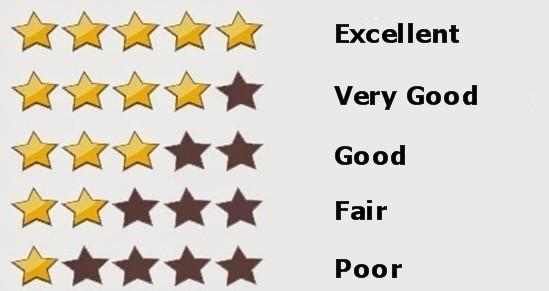

Para el ejercicio de regresión se emplearán directamente los valores de la columna original imdb_score que proporcionan la puntuación de la películas entre 0 y 10.

# Cargamos nuestros datos

In [ ]:
import pandas as pd

# Training data (features)
X = pd.read_csv(main_datasets_path+'tmdb_predefined_features.csv')
X.head()

num_critic_for_reviews  duration  director_facebook_likes  \
0                4.585146  3.113586                -0.262113   
1                1.133250  2.703168                -0.079794   
2                3.593033  1.745528                -0.262113   
3                5.323081  2.475159                 6.862262   
4                2.445134  1.015897                -0.108291   

   actor_3_facebook_likes  actor_1_facebook_likes      gross  num_voted_users  \
0                0.054284               -0.432285  20.449494           886204   
1                0.133318                2.048429  19.550159           471220   
2               -0.323989                0.203796  19.114199           275868   
3               12.124679                1.221525  19.920595          1144337   
4               -0.122861               -0.455184  18.106774           212204   

   cast_total_facebook_likes  facenumber_in_poster  num_user_for_reviews  ...  \
0                       4834                   0.0                3054.0  ...   
1                      48350                   0.0                1238.0  ...   
2                      11700                   1.0                 994.0  ...   
3                     106759                   0.0                2701.0  ...   
4                       1873                   1.0                 738.0  ...   

   language_da  language_de  language_en  language_es  language_fr  \
0            0            0            1            0            0   
1            0            0            1            0            0   
2            0            0            1            0            0   
3            0            0            1            0            0   
4            0            0            1            0            0   

   language_hi  language_it  language_ja  language_ko  language_zh  
0            0            0            0            0            0  
1            0            0            0            0            0  
2            0            0            0            0            0  
3            0            0            0            0            0  
4            0            0            0            0            0  

[5 rows x 168 columns]

In [ ]:
# Labels (range 0-10)
Y = pd.read_csv(main_datasets_path+'tmdb_regression_labels.csv')
Y.head()

imdb_score
0         7.9
1         7.1
2         6.8
3         8.5
4         6.6

In [ ]:
# Film titles (names)
names = pd.read_csv(main_datasets_path+'fused_tmdb_imdb_titles.csv')
names.head()

original_title
0                                   Avatar
1  Pirates of the Caribbean At World's End
2                                  Spectre
3                    The Dark Knight Rises
4                              John Carter

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_test, Y_train_names, Y_test_names = train_test_split(X, names, test_size=0.2, random_state=42)


# Entrenamiento y evaluación de los resultados

Seleccione 3 algoritmos diferentes de aprendizaje automático (machine learning) y entrénelos con los parámetros por defecto empleando los datos proporcionados (X_train, X_test, Y_train, Y_test). Evalúe los resultados utilizando todas las métricas de evaluación que conozca vistas en la asignatura. Al ser una regresión se pueden emplear gran cantidad de métricas: mse, mae... Realize un análisis exhaustivo de los resultados. Tras cada parte de código que desarrolle añada una celda de texto comentando que es lo que ha realizado y los resultados obtenidos. Incluya todos los gráficos que considere oprotunos.

In [ ]:
# Desarrolle el código en los bloques siguientes (utilice todos los que necesite)

Linear Regression:
MSE: 0.11075507433083871
MAE: 0.23365976413369935
R^2: 0.8841362543658261

Random Forest Regressor:
MSE: 0.0598347154696133
MAE: 0.18733425414364663
R^2: 0.9374053577666724

Support Vector Machine Regressor:
MSE: 0.7190365007104269
MAE: 0.6455392987941783
R^2: 0.24779733368114898


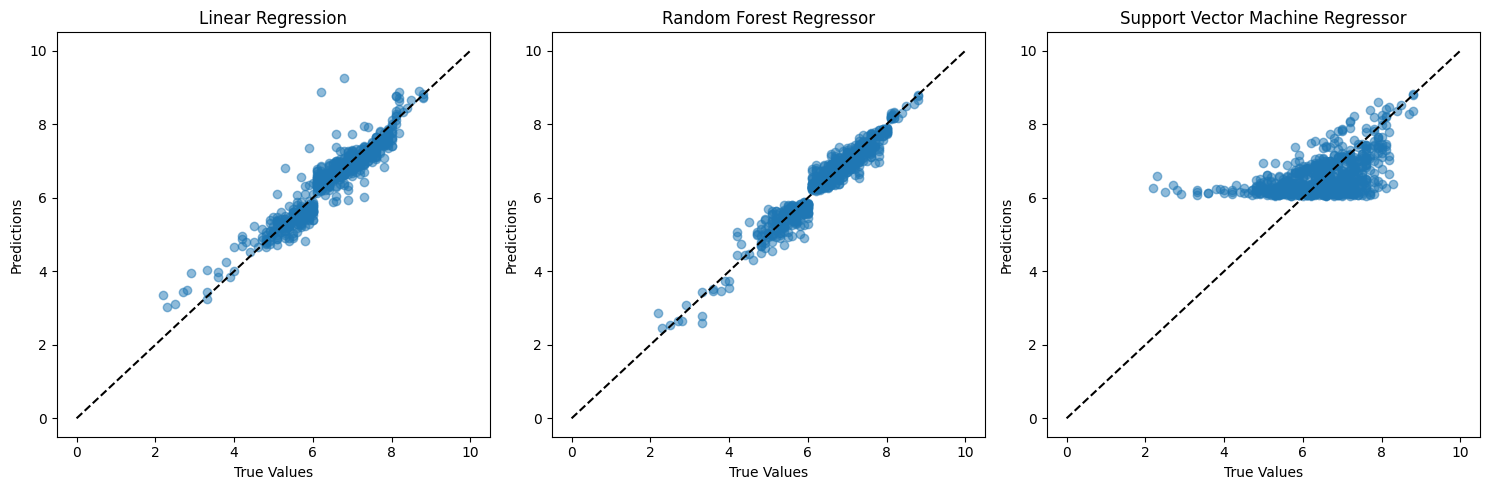

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


# Train Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)

# Train Random Forest Regressor model
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, Y_train.values.ravel())

# Train Support Vector Machine Regressor model
svm_reg = SVR()
svm_reg.fit(X_train, Y_train.values.ravel())

# Make predictions
linear_reg_preds = linear_reg.predict(X_test)
random_forest_preds = random_forest_reg.predict(X_test)
svm_preds = svm_reg.predict(X_test)

# Evaluation metrics
linear_reg_mse = mean_squared_error(Y_test, linear_reg_preds)
random_forest_mse = mean_squared_error(Y_test, random_forest_preds)
svm_mse = mean_squared_error(Y_test, svm_preds)

linear_reg_mae = mean_absolute_error(Y_test, linear_reg_preds)
random_forest_mae = mean_absolute_error(Y_test, random_forest_preds)
svm_mae = mean_absolute_error(Y_test, svm_preds)

linear_reg_r2 = r2_score(Y_test, linear_reg_preds)
random_forest_r2 = r2_score(Y_test, random_forest_preds)
svm_r2 = r2_score(Y_test, svm_preds)

# Print evaluation results
print("Linear Regression:")
print("MSE:", linear_reg_mse)
print("MAE:", linear_reg_mae)
print("R^2:", linear_reg_r2)
print("\nRandom Forest Regressor:")
print("MSE:", random_forest_mse)
print("MAE:", random_forest_mae)
print("R^2:", random_forest_r2)
print("\nSupport Vector Machine Regressor:")
print("MSE:", svm_mse)
print("MAE:", svm_mae)
print("R^2:", svm_r2)

# Plot predictions vs actual values for each model
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(Y_test, linear_reg_preds, alpha=0.5)
plt.plot([0, 10], [0, 10], '--k')
plt.title("Linear Regression")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.subplot(1, 3, 2)
plt.scatter(Y_test, random_forest_preds, alpha=0.5)
plt.plot([0, 10], [0, 10], '--k')
plt.title("Random Forest Regressor")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.subplot(1, 3, 3)
plt.scatter(Y_test, svm_preds, alpha=0.5)
plt.plot([0, 10], [0, 10], '--k')
plt.title("Support Vector Machine Regressor")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.tight_layout()
plt.show()

### Comente de manera general y comparando entre todos los algoritmos los resultados obtenidos.

Podemos observar que Linear Regression y Random Forest son modelos bastante aceptables, nos dan resultados buenos. Sin embargo, SVC tiene un MSE y MAE muy altos, además, podemos observar en las gráficas que las predicciones no son nada precisas.

# Mejorando nuestros resultados de entrenamiento

En este apartado se va a intentar mejorar los resultados de entrenamiento. Para ello recuerde que hemos visto en la asignatura dos métodos. El primero consiste en emplear diferentes métodos de evaluación. Esto nos permitirá poder entrenar nuestro modelos con diferentes particiones del dataset completo (X, Y) y no sólo emeplear una partición fija como en el caso anterior.

Por otro lado, existen técnicas de optimización de hiperparámetros. Con estas técnicas podemos encontrar los valores óptimos de los hiperparámetros de los algoritmos de Machine Learning de cara a mejorar los resultados.

Implemente en este apartado diferentes métodos de evaluación y optimización de hiperparámetros e intente mejorar los resultados con cada uno de los tres algortimos usados en el apartado anterior. Puede emplear todas las técnicas que considere pero comente siempre los resultados obtenidos en detalle (icluya una celda de texto tras cada parte que desarrolle y comentando cada resultado). Incluya todos los gráficos que considere oprotunos.

*** Nota: Puede ser que no se llegue a conseguir una mejore pero intente probar diferentes técnicas y comente el resultado aunque no sea mejor. Hecho esto pruebe otra técnica. No tiene por qué eliminar el código si el resultado no es satisfactorio. Simplemente realice todos los comentarios que considere.

In [ ]:
# Desarrolle el código en los bloques siguientes (utilice todos los que necesite)

Linear Regression Cross-Validation MSE Scores: [0.11573613 0.1184867  0.11880341]
Linear Regression Cross-Validation Mean MSE: 0.117675415016206
Best Random Forest Regressor Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}

Linear Regression:
MSE: 0.11075507433083871
MAE: 0.23365976413369935
R^2: 0.8841362543658261

Random Forest Regressor:
MSE: 0.059124840815156524
MAE: 0.18611250027405074
R^2: 0.9381479759888448


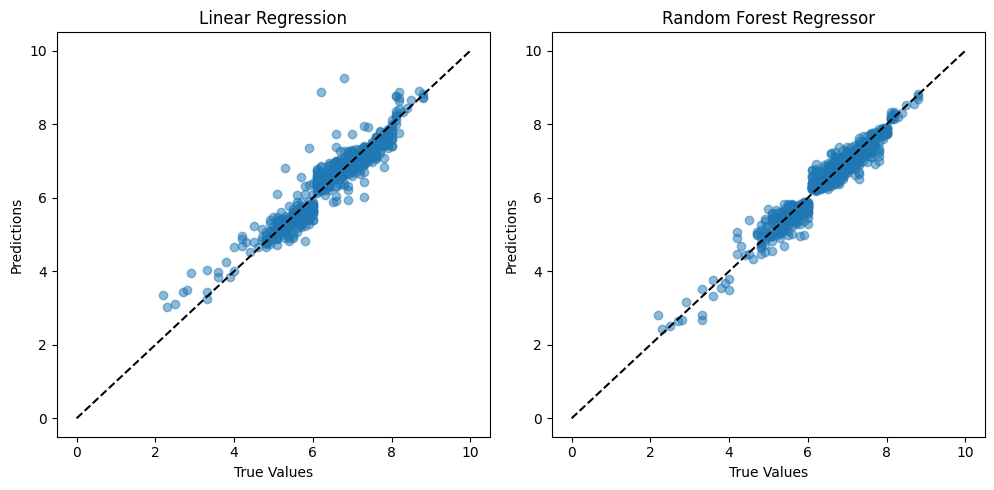

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
# Assuming X and Y are already defined
# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Linear Regression
# Train Linear Regression model with cross-validation
linear_reg = LinearRegression()
linear_reg_scores = cross_val_score(linear_reg, X_train, Y_train, cv=3, scoring='neg_mean_squared_error')
print("Linear Regression Cross-Validation MSE Scores:", -linear_reg_scores)
print("Linear Regression Cross-Validation Mean MSE:", -linear_reg_scores.mean())

# Random Forest Regressor
# Tune hyperparameters using RandomizedSearchCV
param_dist_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
random_search_rf = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                                      param_distributions=param_dist_rf,
                                      n_iter=4,
                                      cv=3,
                                      scoring='neg_mean_squared_error',
                                      random_state=42,
                                      n_jobs=-1)
random_search_rf.fit(X_train, Y_train.values.ravel())
print("Best Random Forest Regressor Parameters:", random_search_rf.best_params_)
best_rf_model = random_search_rf.best_estimator_

# Support Vector Machine Regressor
# Tune hyperparameters using RandomizedSearchCV


# Evaluation metrics
# Linear Regression
linear_reg.fit(X_train, Y_train)
linear_reg_preds = linear_reg.predict(X_test)
linear_reg_mse = mean_squared_error(Y_test, linear_reg_preds)
linear_reg_mae = mean_absolute_error(Y_test, linear_reg_preds)
linear_reg_r2 = r2_score(Y_test, linear_reg_preds)

# Random Forest Regressor
random_forest_preds = best_rf_model.predict(X_test)
random_forest_mse = mean_squared_error(Y_test, random_forest_preds)
random_forest_mae = mean_absolute_error(Y_test, random_forest_preds)
random_forest_r2 = r2_score(Y_test, random_forest_preds)


# Print evaluation results
print("\nLinear Regression:")
print("MSE:", linear_reg_mse)
print("MAE:", linear_reg_mae)
print("R^2:", linear_reg_r2)

print("\nRandom Forest Regressor:")
print("MSE:", random_forest_mse)
print("MAE:", random_forest_mae)
print("R^2:", random_forest_r2)


# Plot predictions vs actual values for each model
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(Y_test, linear_reg_preds, alpha=0.5)
plt.plot([0, 10], [0, 10], '--k')
plt.title("Linear Regression")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.subplot(1, 3, 2)
plt.scatter(Y_test, random_forest_preds, alpha=0.5)
plt.plot([0, 10], [0, 10], '--k')
plt.title("Random Forest Regressor")
plt.xlabel("True Values")
plt.ylabel("Predictions")


plt.tight_layout()
plt.show()


### Comente de manera general y comparando entre todos los algoritmos los resultados obtenidos.

Hemos usado cross validation para Linear Regression y Random Search para Random Forest. De esta manera, intentamos encontrar los mejores parámetros para cada modelo. Sin embargo, no hemos conseguido una mejora considerable en ninguno de los dos, aun así los modelos ya eran buenos de por sí, por lo que las mejoras serían pequeñas. En cuanto al SVC, debido a los malos resultados anteriores y al alto coste computacional, hemos decidido no incluirlo en este apartado.

# Aplicando técnicas de Explicabilidad para entender nuestros algoritmos

Realizado el apartado anterior puede haber conseguido un modelo con grandes prestaciones en cuanto a las métricas empleadas. En este apartado vamos a realizar un nuevo análisis. En este caso vamos a intentar comprender porqué nuestro modelo es tan bueno realizando predicciones y para ello haremos uso de técnicas de explicabilidad de modelos. En la asignatura se han visto gran cantidad de ellas. Se pide en este apartado que seleccione el mejor de los tres modelos que ha conseguido y realice un análisis exhaustivo de explicabilidad de este.

Puede aplicar técnicas de importancia de características, PDP, Curvas ICE, algoritmos LIME y SHAP... Presente todos los resultados que considere oportunos. Por ejemplo, puede emplear LIME para extraer una primera visión de que características son más importantes. Hecho esto puede aplicar los PDP y curvas ICE a estas características más relevantes. Para finalizar puede aplicar SHAP y presentar gran cantidad de plot de todos los que ofrece la librerías.

Se busca un análisis exhaustivo de sus resultados y que presenten gran cantidad de técnicas de cara a realziar un informe de las características más relevantes y como se comportan entre ellas. Analice también que características parecen poco relevante y argumente porqué. Analice además los casos de error en su dataset, filas mal clasificadas, para comprender a que se debe que no se estén clasificando correctamente.

Incluya una celda de texto tras cada desarrollo explicando que está realizando y los resultados que ha obtenido. Incluya tanto grñaficos como pueda y crea necesario.

In [ ]:
# Desarrolle el código en los bloques siguientes (utilice todos los que necesite)

In [ ]:
!pip install lime
!pip install shap

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import lime
import lime.lime_tabular
import shap
import matplotlib.pyplot as plt

# Load dataset
# Assuming X and Y are already defined

# Train the best model (Random Forest Regressor)
best_model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=1, random_state=42)
best_model.fit(X_train, Y_train.values.ravel())

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, mode='regression')
i = 2 # Select sample for explanaition
exp = explainer.explain_instance(X_test.iloc[i], best_model.predict, num_features=13)
exp.show_in_notebook(show_table=True)
print("Explanation Local Prediction  : ", exp.local_pred)
print("Explanation Global Prediction : ", exp.predicted_value)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Explanation Local Prediction  :  [7.26799559]
Explanation Global Prediction :  7.84131269467694


[[[6.38625268 6.38593121 6.38592887 ... 6.39607222 6.39607958 6.39608147]
  [6.3848019  6.38448044 6.38447809 ... 6.39463522 6.39464258 6.39464447]
  [6.38134239 6.38102092 6.38101858 ... 6.39100209 6.39100944 6.39101133]
  ...
  [6.45256542 6.45226603 6.45226369 ... 6.46559463 6.46558378 6.46557655]
  [6.45269269 6.4523933  6.45239096 ... 6.46572191 6.46571105 6.46570383]
  [6.45318908 6.45288969 6.45288735 ... 6.4662948  6.46628395 6.46627672]]]
[array([-1.12155149, -1.08814647, -1.05474146, -1.02133644, -0.98793142,
       -0.95452641, -0.92112139, -0.88771638, -0.85431136, -0.82090634,
       -0.78750133, -0.75409631, -0.72069129, -0.68728628, -0.65388126,
       -0.62047624, -0.58707123, -0.55366621, -0.52026119, -0.48685618,
       -0.45345116, -0.42004614, -0.38664113, -0.35323611, -0.3198311 ,
       -0.28642608, -0.25302106, -0.21961605, -0.18621103, -0.15280601,
       -0.119401  , -0.08599598, -0.05259096, -0.01918595,  0.01421907,
        0.04762409,  0.0810291 ,  0.1144341

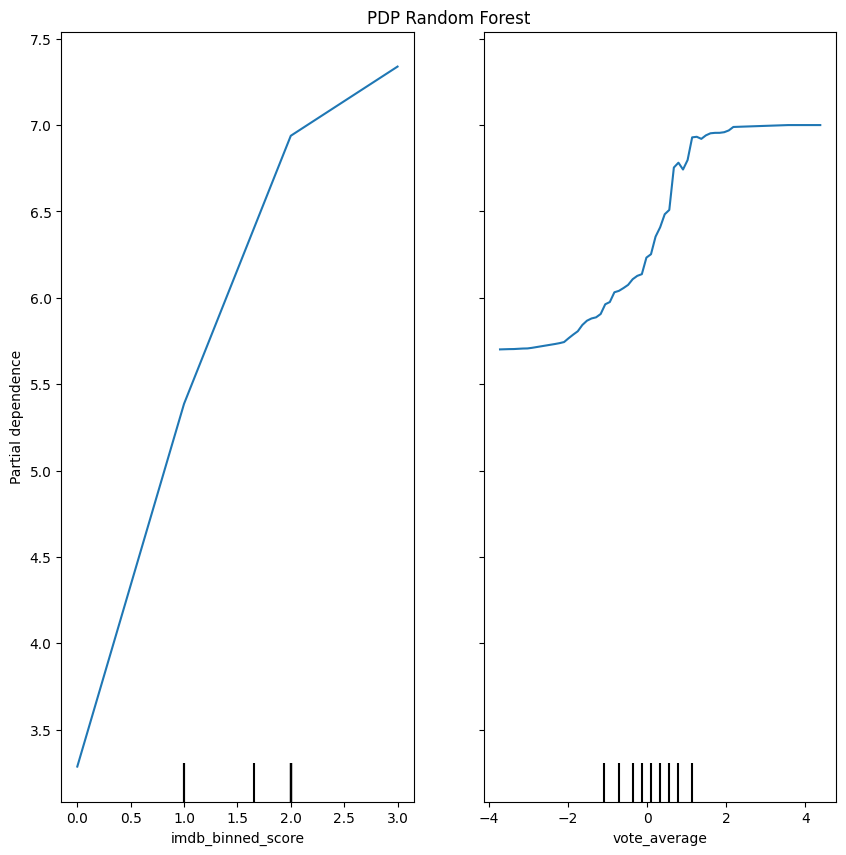

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

col1 = 'imdb_binned_score'
col2 = 'vote_average'
# Busca el índice de la columna en la lista de nombres de columnas
ind1 = X_train.columns.get_loc(col1)
ind2 = X_train.columns.get_loc(col2)

# Crea una lista de características que incluya el índice de la columna más importante
features = [ind1, ind2]


results = partial_dependence(best_model, X_test, [0,1], kind='average')
print(results["average"])
print(results["values"])

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("PDP Random Forest")
display = PartialDependenceDisplay.from_estimator(best_model, X_test, features, ax=ax)


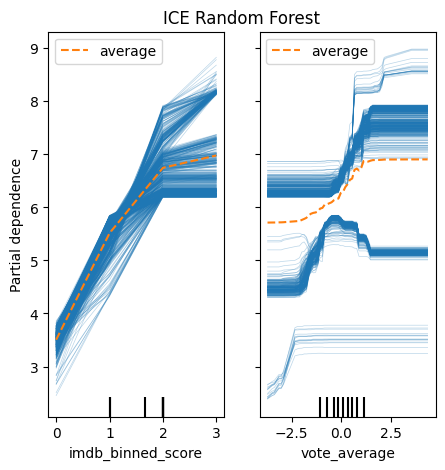

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title("ICE Random Forest")
display = PartialDependenceDisplay.from_estimator(best_model, X_test, features, ax=ax, kind="both")

 95%|=================== | 688/724 [00:33<00:01]       

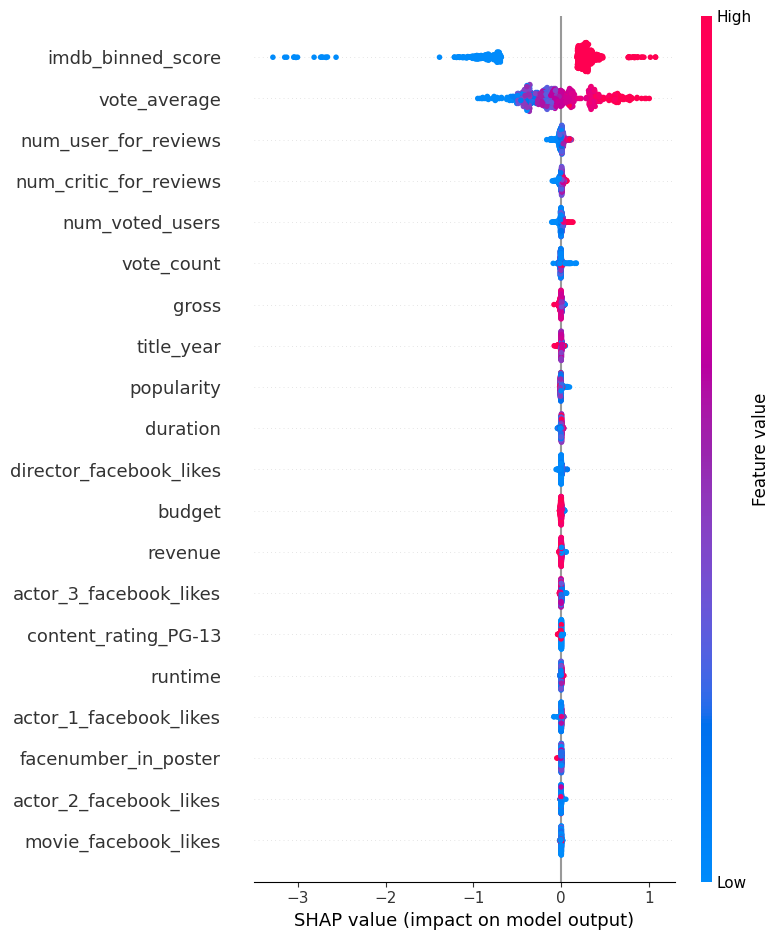

In [ ]:
# Calcular los valores SHAP
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

# Mostrar el resumen de los valores SHAP
shap.summary_plot(shap_values, X_test, feature_names=X_train.columns)



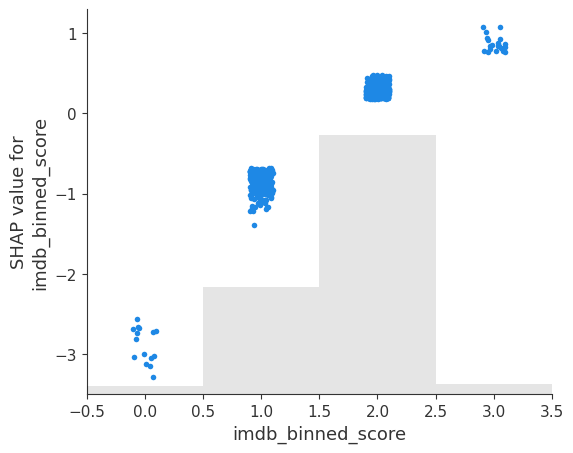

In [ ]:
# Mostrar un gráfico de dispersión de SHAP
shap.initjs()
shap.plots.scatter(shap_values[:, ind1])

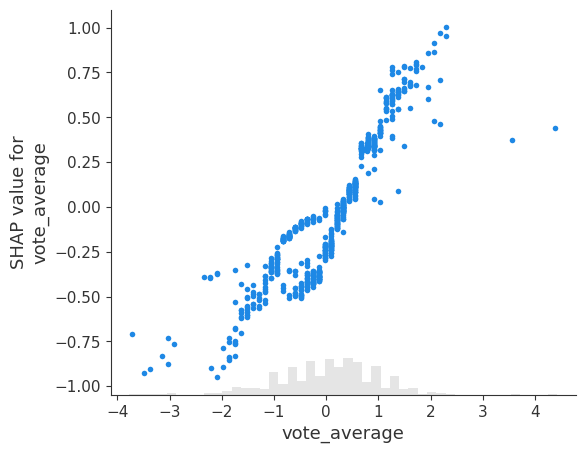

In [ ]:
shap.initjs()
shap.plots.scatter(shap_values[:, ind2])

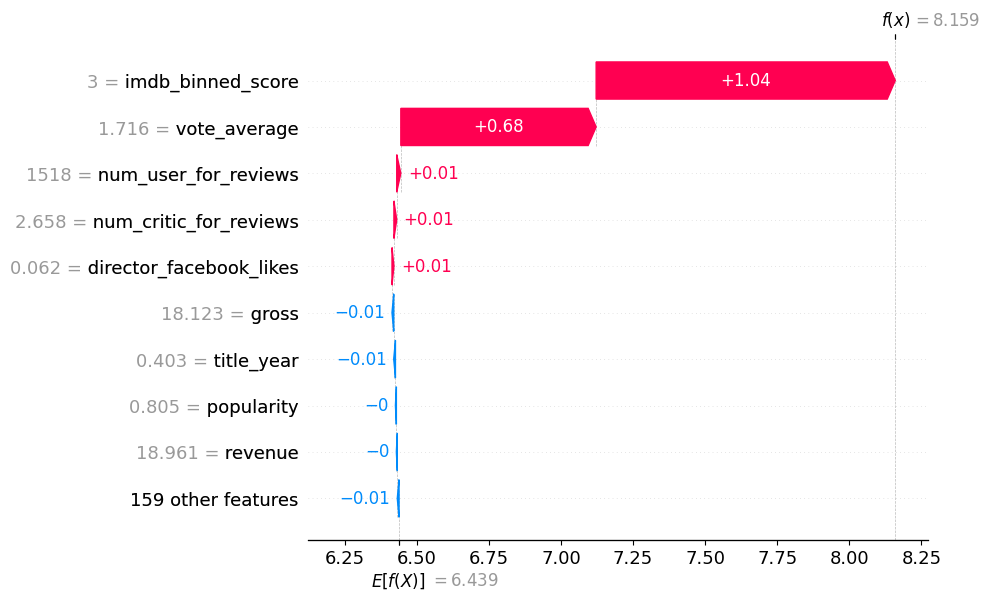

In [ ]:
shap.initjs()
explainer = shap.Explainer(best_model)
sv = explainer(X_test)
exp = shap.Explanation(sv, sv.base_values, X_train, feature_names=X_test.columns)
shap.waterfall_plot(exp[ind1])

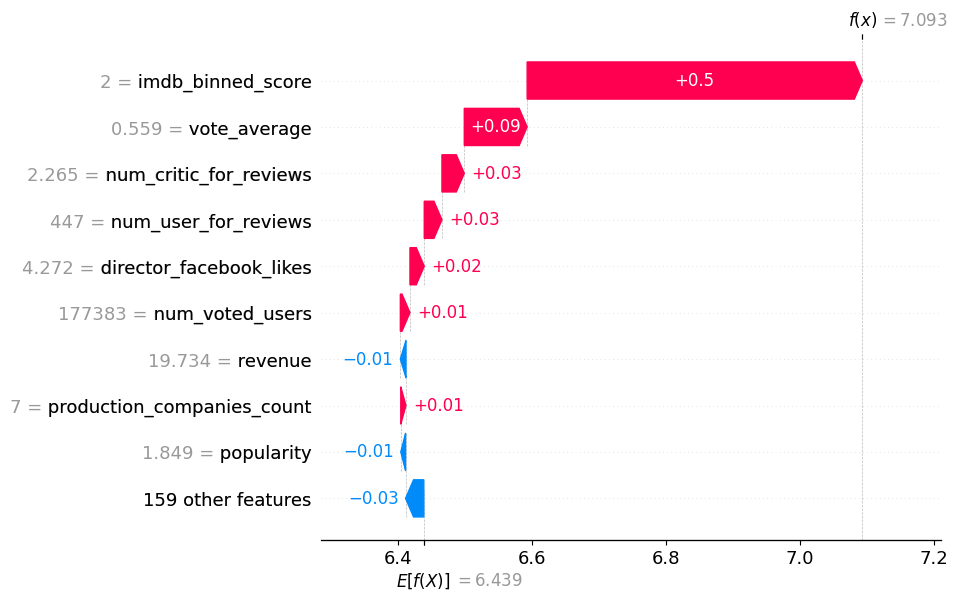

In [ ]:
shap.initjs()
explainer = shap.Explainer(best_model)
sv = explainer(X_test)
exp = shap.Explanation(sv, sv.base_values, X_train, feature_names=X_test.columns)
shap.waterfall_plot(exp[ind2])

### Comente de manera general y comparando entre todos los algoritmos los resultados obtenidos.

Cogemos el mejor modelo, que en este caso es Random Forest. Con LIME podemos ver las características que tienen mas importancia, siendo imdb_binned_score la que más valor tiene, seguida de vote_average (ambas bastante esperables). Otras como las referentes a distintos países y lenguas no tienen nada de peso, como también es lógico. Después, usando SHAP vemos gráficamente como cada característica contribuye a la predicción del modelo. Vemos que coincide con LIME en cuáles son las más importantes, que además podemos observar que lo son con gran diferencia.